# Clasificación utilizando XGBoost (Core)

**Objetivo:* Implementar un pipeline completo de machine learning para un problema de clasificación utilizando XGBoost. Se hará especial énfasis en el Análisis Exploratorio de Datos (EDA), preprocesamiento, entrenamiento del modelo y optimización de hiperparámetros.

**Dataset:** Heart Disease UCI

**Descripción del Dataset:** El dataset de enfermedades del corazón de la UCI contiene información sobre varios factores de riesgo asociados con enfermedades cardíacas. El objetivo es predecir * la presencia de enfermedad cardíaca basándose en estos factores.

**Parte 1: Carga y Exploración Inicial de Datos**

**Carga del Dataset:**

* Cargar el dataset desde Kaggle.

**Exploración Inicial:**

* Revisar la estructura del dataset.

* Describir las variables y su distribución.

* Identificar y documentar valores faltantes y outliers.



**Parte 2: Análisis Exploratorio de Datos (EDA)**

**Análisis Estadístico Descriptivo:**

* Calcular estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.).

* Analizar la distribución de las variables categóricas.

**Visualizaciones:**

* Crear histogramas y gráficos de barras para entender la distribución de las variables.

**Valores Faltantes y Outliers:**

* Detectar y tratar valores faltantes.

* Identificar y manejar outliers.



**Parte 3: Preprocesamiento de Datos**

**Transformación de Columnas:**

* Codificar variables categóricas utilizando One-Hot Encoding.

* Escalar características numéricas utilizando StandardScaler.

**División del Conjunto de Datos:**

* Dividir el dataset en conjuntos de entrenamiento y prueba.



**Parte 4: Implementación de XGBoost**

**Entrenamiento del Modelo:**

* Entrenar un modelo de XGBoost con hiperparámetros básicos.

* Evaluar el modelo utilizando métricas de rendimiento como la exactitud, precisión, recall, F1-Score y ROC-AUC.

**Optimización de Hiperparámetros:**

* Utilizar GridSearchCV para optimizar los hiperparámetros del modelo de XGBoost.

**Evaluación del Modelo Optimizado:**

* Evaluar el rendimiento del modelo optimizado y compararlo con el modelo inicial.

In [3]:
# Importar librerías
import pandas as pd

In [4]:
#Cargar el dataset y revisar su estructura básica.
# Cargar el dataset
path = "../data/heart_disease_uci.csv"
df = pd.read_csv(path, sep=',')

# Revisar la estructura básica del dataset
print("Primeras 5 filas del dataset:")
print(df.head())

print("\nInformación del dataset:")
print(df.info())  # Información sobre columnas, tipos de datos y valores nulos.

Primeras 5 filas del dataset:
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4     

In [5]:
print("\nDescripción estadística básica:")
print(df.describe())  # Estadísticas básicas del dataset.


Descripción estadística básica:
               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.00


Distribución de variables categóricas:

Distribución de sex:
sex
Male      726
Female    194
Name: count, dtype: int64

Distribución de dataset:
dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

Distribución de cp:
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

Distribución de fbs:
fbs
False    692
True     138
Name: count, dtype: int64

Distribución de restecg:
restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

Distribución de exang:
exang
False    528
True     337
Name: count, dtype: int64

Distribución de slope:
slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64

Distribución de thal:
thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

Valores faltantes por columna:
id            0
age         

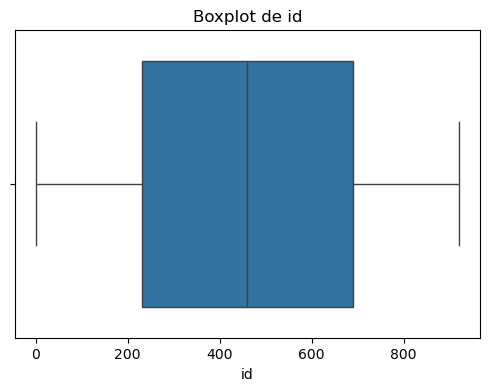

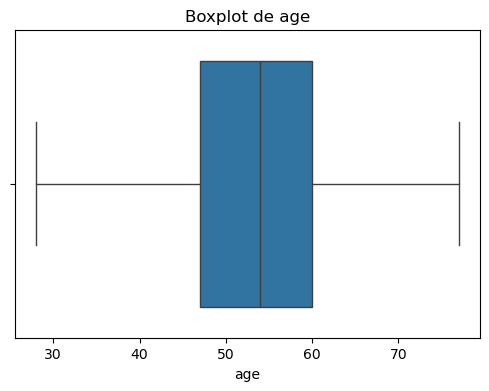

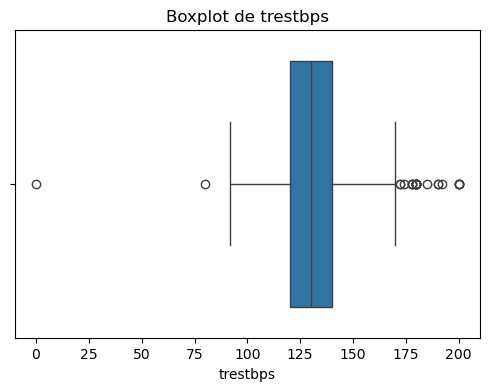

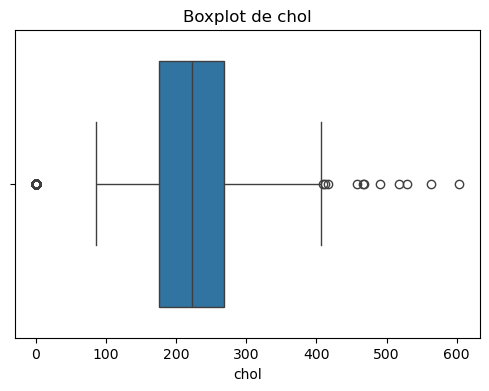

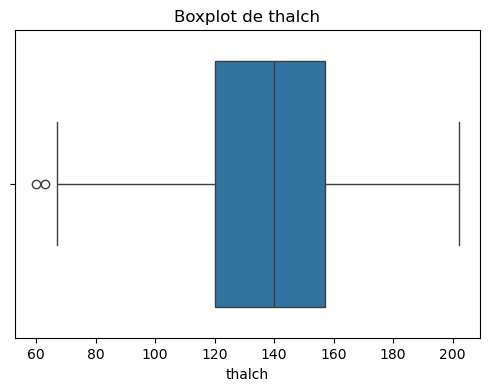

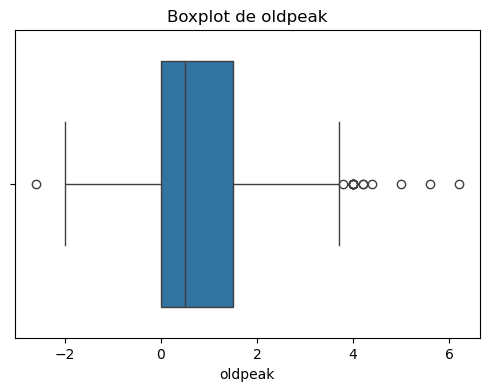

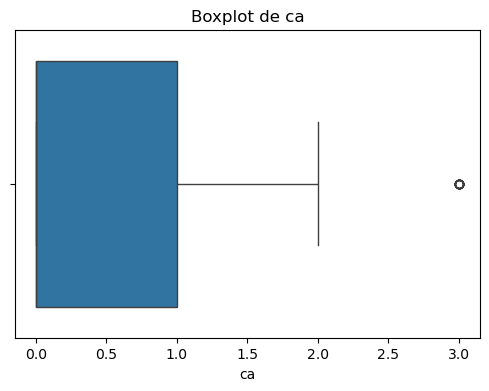

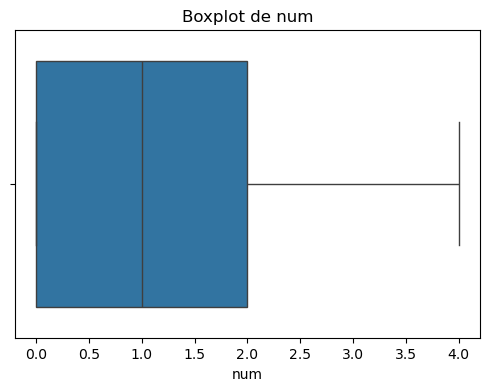

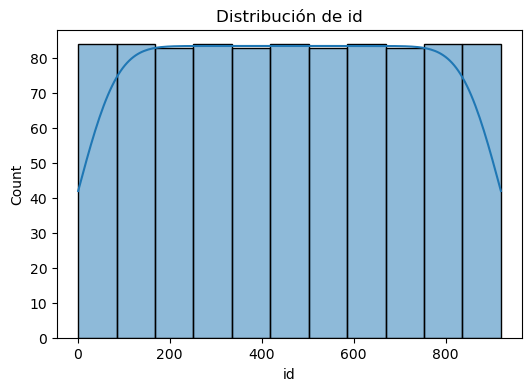

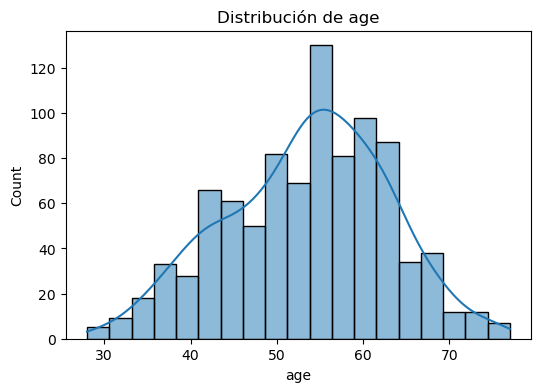

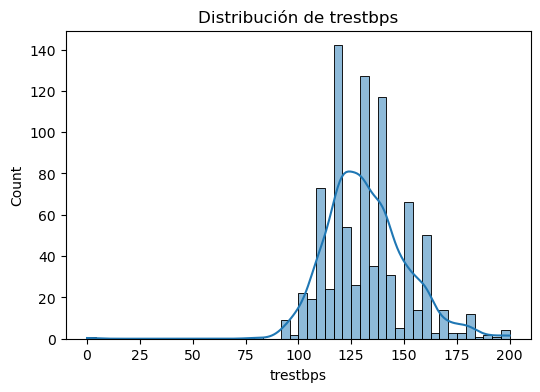

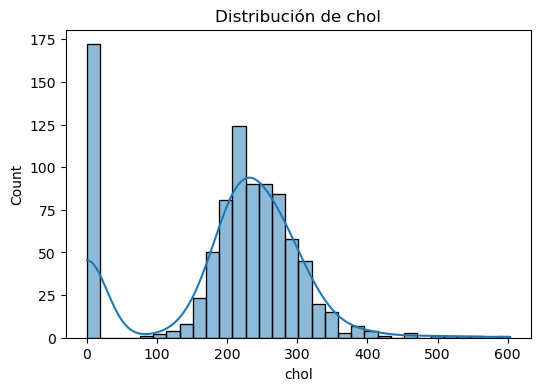

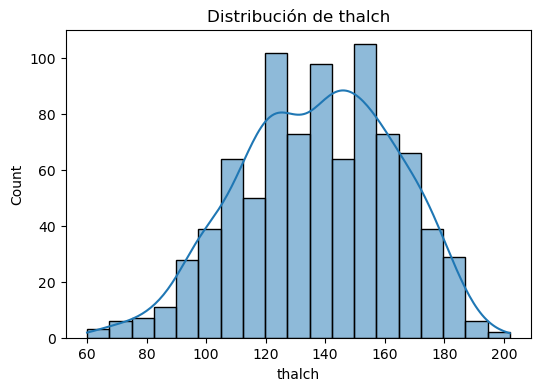

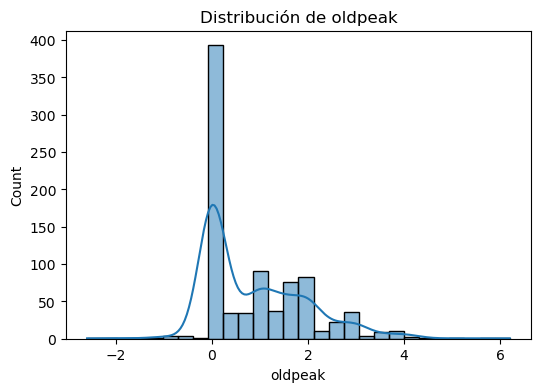

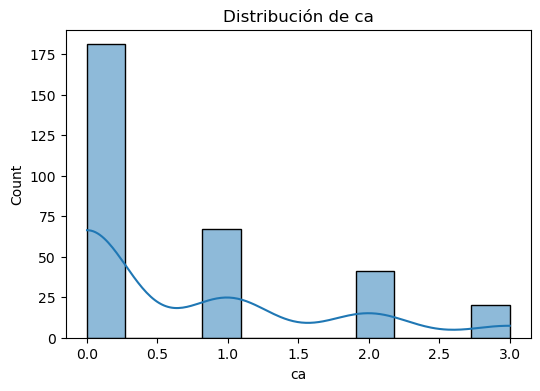

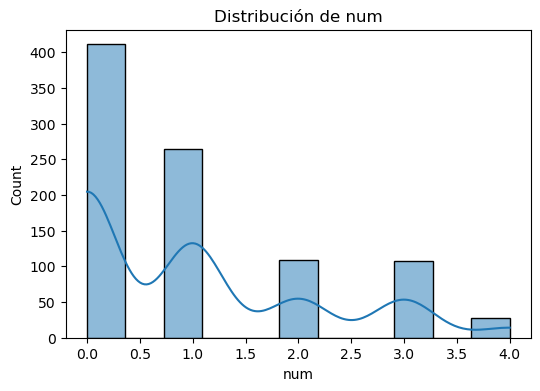

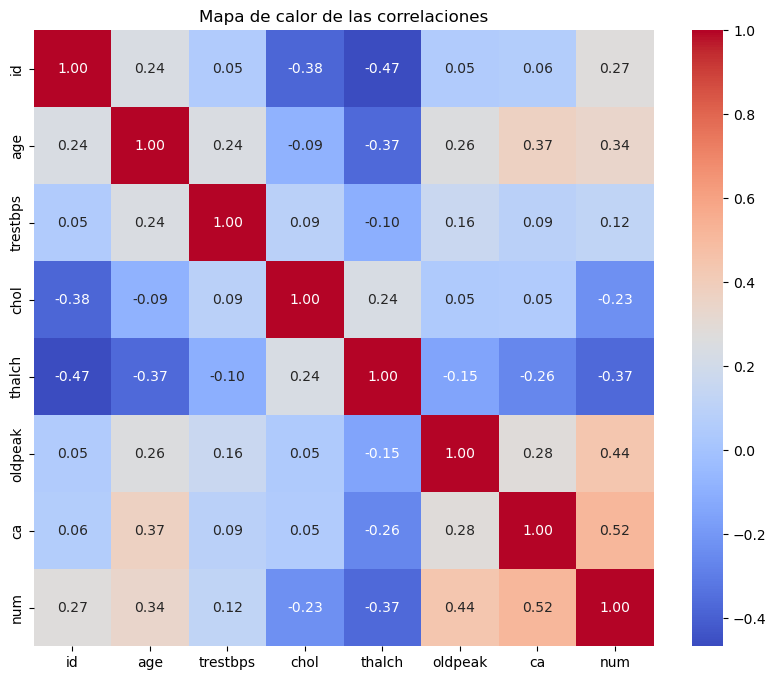


Valores faltantes después de imputación:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs          90
restecg       2
thalch        0
exang        55
oldpeak       0
slope       309
ca            0
thal        486
num           0
dtype: int64

Datos preprocesados listos para el modelado.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Análisis de las variables categóricas
print("\nDistribución de variables categóricas:")
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    print(f"\nDistribución de {col}:")
    print(df[col].value_counts())

# Detectar valores faltantes
print("\nValores faltantes por columna:")
print(df.isna().sum())

# Detectar outliers (usando boxplots)
numeric_columns = df.select_dtypes(include='number').columns
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

# Visualización de la distribución de las variables numéricas
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

# Visualización de correlaciones entre las variables numéricas
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de las correlaciones')
plt.show()

# Imputar valores faltantes utilizando la media para columnas numéricas
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Verificar si aún hay valores faltantes
print("\nValores faltantes después de imputación:")
print(df.isna().sum())

# Preprocesamiento: Codificación y escalado
# Codificación de variables categóricas con One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Escalar características numéricas
scaler = StandardScaler()
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

# División en conjuntos de entrenamiento y prueba
X = df_encoded.drop(columns=['num'])
y = df_encoded['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nDatos preprocesados listos para el modelado.")
